In [2]:
import random
import numpy as np
from math import exp, sqrt

#### implement 1M simulation i pure python

In [11]:
%%time

S0=100 # ini price
r=0.05 ##(risk free) rate
T=1.0  # number of periods
sigma=0.2 #price volatility

values=[] #initialize an empty list

###implement with pure python's list

for _ in range(0,1000000):
    ST = S0 * exp( (r- 1/2 * sigma **2)  * T + sigma * random.gauss(0,1) * sqrt(T) )
    values.append(ST)

print(len(values))

1000000
CPU times: user 1.42 s, sys: 27.3 ms, total: 1.45 s
Wall time: 1.45 s


#### implement 1M simulation in vectorized form with numpy

In [12]:
%%time
S0=100 # ini price
r=0.05 ##(risk free) rate
T=1.0  # number of periods
sigma=0.2 #price volatility

# 1-liner no more for loop for a vectorized impleentation
ST = S0 * np.exp( (r- 1/2 * sigma **2) * T + sigma * np.random.standard_normal(1000000) * np.sqrt(T))

print(len(ST))

1000000
CPU times: user 54.4 ms, sys: 10.6 ms, total: 65 ms
Wall time: 55.3 ms


#### make a chart of bitcoin with matpotlib

In [20]:
import configparser
c = configparser.ConfigParser()  # <2>
c.read('/Users/zimine/Dropbox/credentials/pyalgo.cfg')

['/Users/zimine/Dropbox/credentials/pyalgo.cfg']

In [22]:
%matplotlib inline
from pylab import mpl, plt  # <1>
plt.style.use('seaborn')  # <1>
mpl.rcParams['font.family'] = 'serif' 

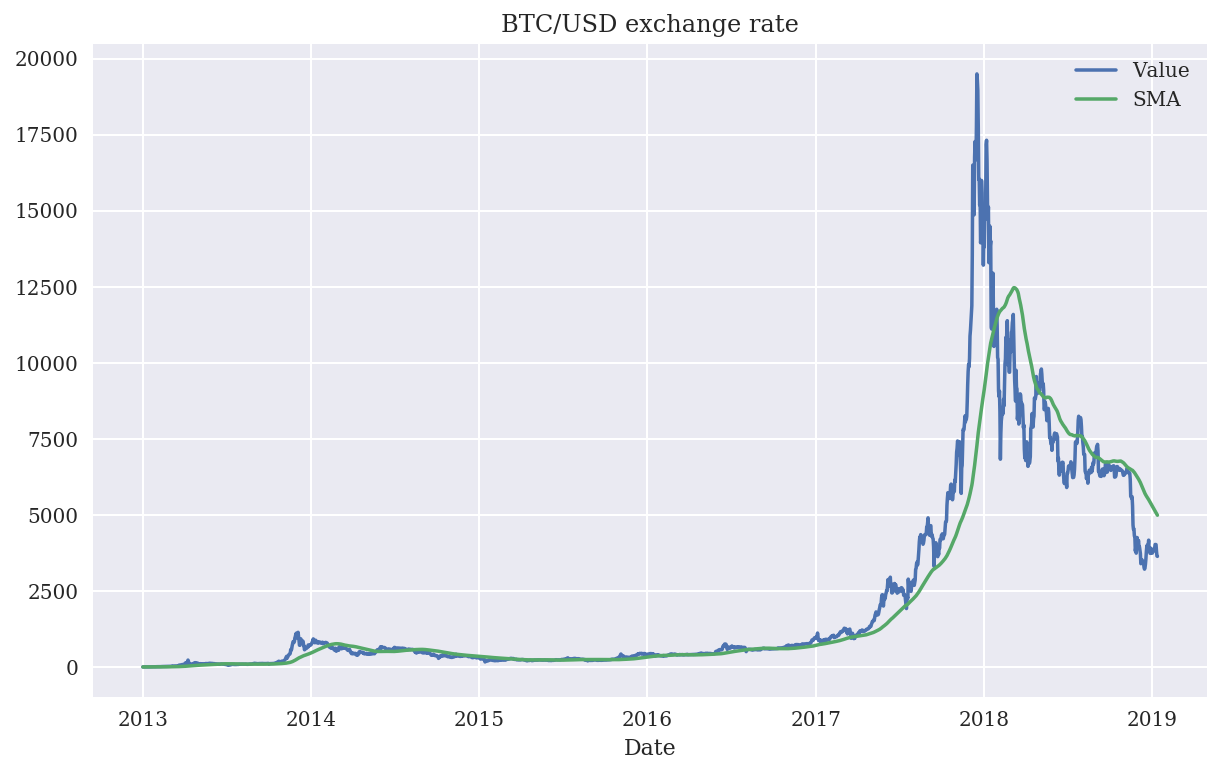

In [24]:
import quandl as q  # <3>
q.ApiConfig.api_key = c['quandl']['api_key']  # <3>
d = q.get('BCHAIN/MKPRU')  # <4>
d['SMA'] = d['Value'].rolling(100).mean()  # <5>
d.loc['2013-01-01':,:].plot(title='BTC/USD exchange rate',
                            figsize=(10, 6));  # <6>
plt.savefig('./_tmp_bitcoin_xr.png')

In [25]:
d.tail(4)

,Value,SMA
Date,,
2019-01-10,4034.138333,5083.268307
2019-01-11,3812.585833,5055.767748
2019-01-12,3656.735833,5027.631082
2019-01-13,3646.345833,4998.458257
